<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%80_%E6%B2%88%E7%9D%BF%E6%9C%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

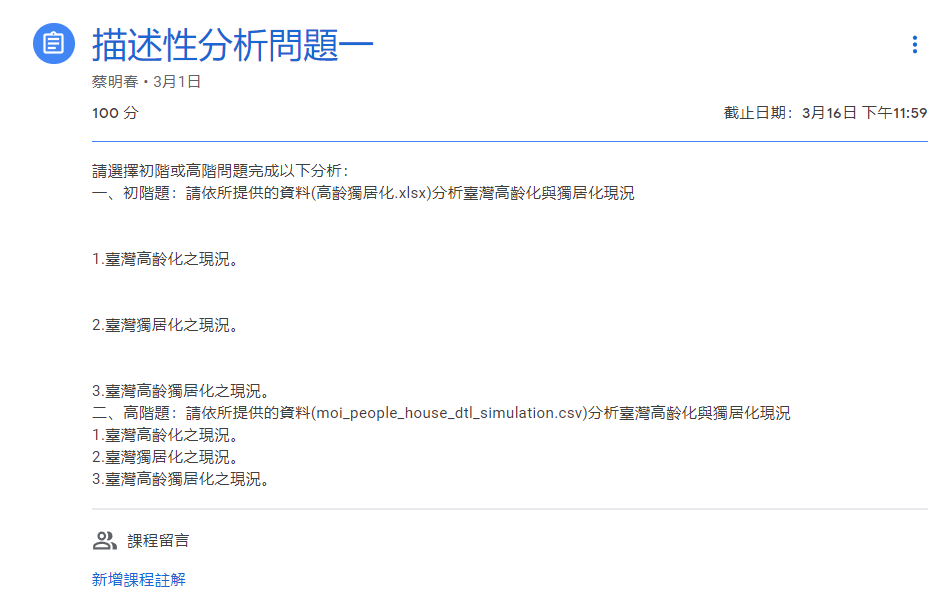

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 16.7 MB 29.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.5 MB/s 


In [ ]:
# !pip install geoplot

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-03-18 13:38:18--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.145.138, 142.250.145.101, 142.250.145.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/42sbtv0id1g3h3it106ins3ppdm64hfa/1647610650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-18 13:38:22--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/42sbtv0id1g3h3it106ins3ppdm64hfa/1647610650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.1

In [ ]:
import geopandas as gpd
# import shapely
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import patches as mpatches

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/大學/高齡獨居化計畫.csv')

# df['older_precent'] = df['Total_older'] / df['total_city_people'] *100 
# df['lonely_precent'] = df['total_lonely'] / df['total_city_people'] *100 
# df['older_lonely_precent'] = df['total_old_and_lonely'] / df['total_city_people'] *100 


plt.rcParams['figure.figsize']=(10,10)

#匯入地圖套件
town_TA = gpd.read_file('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/台灣地圖/TOWN_MOI_1081121.shp', encoding='utf-8')


#匯入地區區碼
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)

#區碼 跟 資料合併
df = df.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))


#資料 跟 經緯度合併
town_A_no = town_TA.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))


#百分比資料
city_A_no = pd.DataFrame(town_A_no.groupby('COUNTYNAME').sum()['Total_older'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people'],columns=['older_precent'])
city_A_no['lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']
city_A_no['older_lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_old_and_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']

#百分比資料加入總資料
town_A_no = town_A_no.merge(city_A_no, left_on=('COUNTYNAME'), right_on=('COUNTYNAME'))
town_A_no.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,addr_city_cd,Total_older,...,total_child_is_same_county,total_old_and_child_is_same_county,total_mate,total_old_and_mate,total_city_people,戶籍鄉鎮市區,縣市,older_precent,lonely_precent,older_lonely_precent
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",10014020,2790,...,5906,2169,5633,1585,13842,10014020.0,臺東縣,0.164779,0.139813,0.039632
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",10014110,464,...,1864,422,1830,297,4080,10014110.0,臺東縣,0.164779,0.139813,0.039632
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",10014160,386,...,2023,333,2000,177,5153,10014160.0,臺東縣,0.164779,0.139813,0.039632
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",10014050,1614,...,3431,1243,3212,863,7736,10014050.0,臺東縣,0.164779,0.139813,0.039632
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",10014060,1754,...,3579,1371,3288,932,8153,10014060.0,臺東縣,0.164779,0.139813,0.039632


# 第一題



## 1.高齡


Text(0.5, 1.0, '臺灣高齡化之現況')

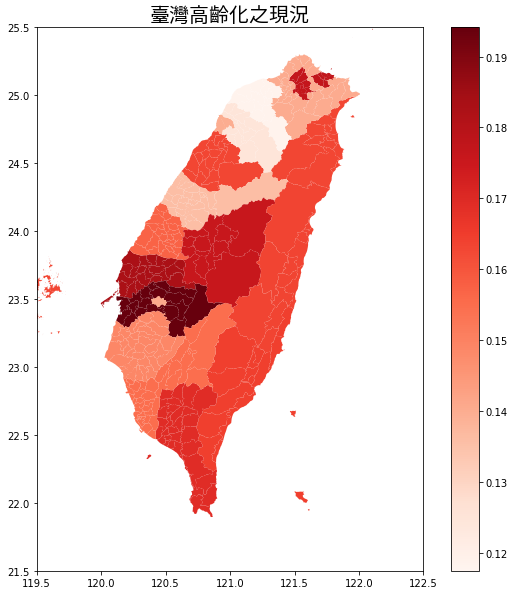

In [ ]:
SA=town_A_no.plot(column='older_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況')

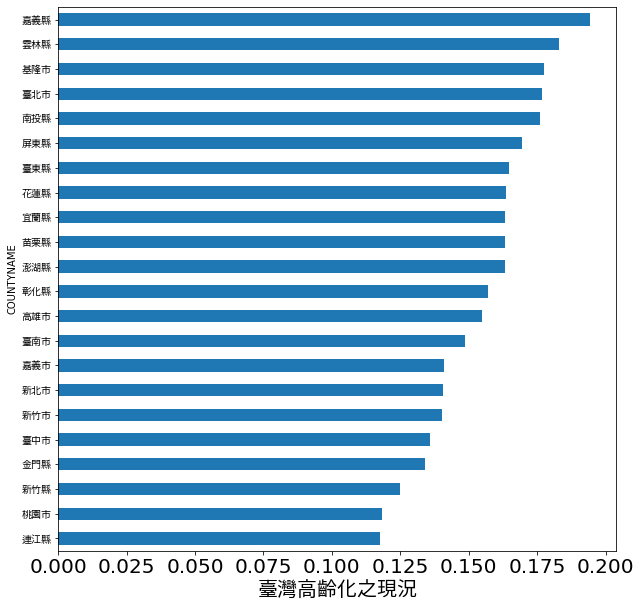

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_precent')['older_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況',fontproperties=myfont,fontsize=20)

## 2.獨居


Text(0.5, 1.0, '臺灣獨居化之現況')

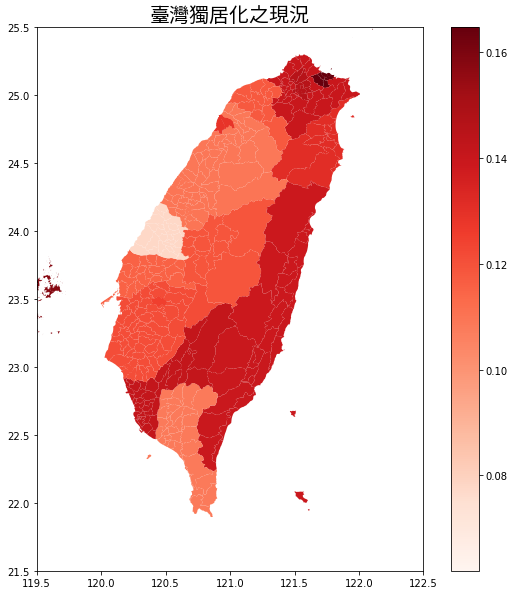

In [ ]:
SA=town_A_no.plot(column='lonely_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣獨居化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣獨居化之現況')

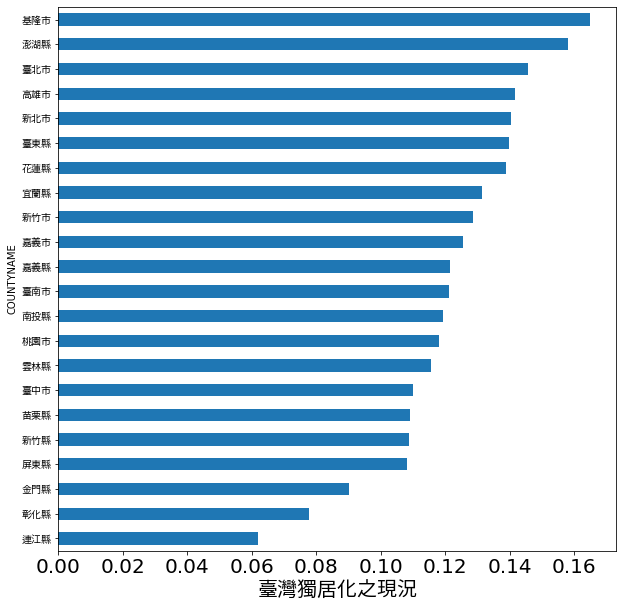

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('lonely_precent')['lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況',fontproperties=myfont,fontsize=20)

## 3.高齡且獨居

Text(0.5, 1.0, '臺灣高齡獨居化之現況。')

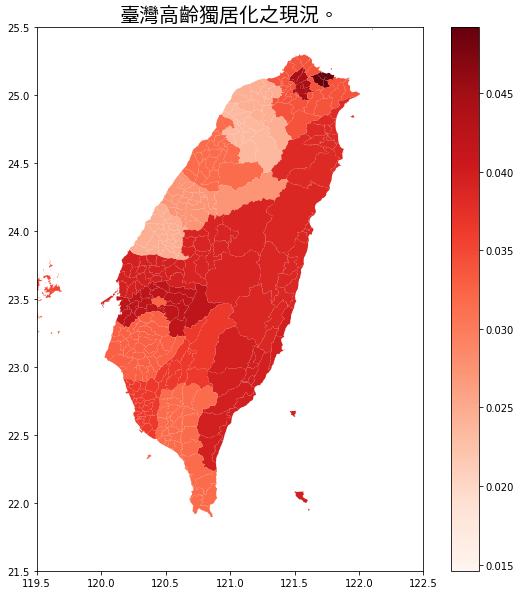

In [ ]:
SA=town_A_no.plot(column='older_lonely_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡獨居化之現況。",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡獨居化之現況。')

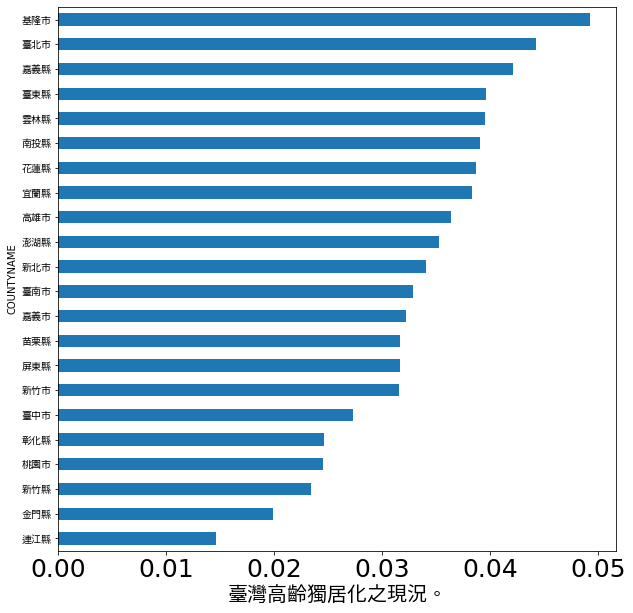

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')['older_lonely_precent'].plot.barh(fontsize=25)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化之現況。',fontproperties=myfont,fontsize=20)

# 第二題

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/moi_people_house_dtl_simulation.csv')
data.dropna(axis=0, how='any', inplace=True)

## 1.高齡

In [ ]:
import time
import datetime
times = datetime.datetime.now()

2022

In [ ]:
#把年齡人口弄出來
data['old_80'] = data['birthday_date'].apply(lambda x: 1 if times.year - int(x[:4]) > 80 else 0 )
data['old_65'] = data['birthday_date'].apply(lambda x: 1 if times.year - int(x[:4]) > 65 else 0 )
data['lonely'] = data['household_type_cd'].apply(lambda x: 1 if x == 1 else 0 )
data['older_lonely'] = (data['old_65'] == 1) & (data['lonely'] == 1)
data['TotalPeople'] = 1

#區碼 跟 資料合併
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

#縣市百分比資料
city_people_percent = pd.DataFrame(data.groupby('縣市').sum()['old_80'] / data.groupby('縣市').sum()['old_65'] , columns=['city_older_precent'])
city_people_percent['city_lonely_precent'] = data.groupby('縣市').sum()['lonely'] / data.groupby('縣市').sum()['TotalPeople']
city_people_percent['city_older_lonely_precent'] = data.groupby('縣市').sum()['older_lonely'] / data.groupby('縣市').sum()['TotalPeople']


#鄉鎮百分比資料
town_people_percent = pd.DataFrame(data.groupby('TOWNNAME').sum()['old_65'] / data.groupby('TOWNNAME').sum()['TotalPeople'] , columns=['town_older_precent'])
town_people_percent['town_lonely_precent'] = data.groupby('TOWNNAME').sum()['lonely'] / data.groupby('TOWNNAME').sum()['TotalPeople']
town_people_percent['town_older_lonely_precent'] = data.groupby('TOWNNAME').sum()['older_lonely'] / data.groupby('TOWNNAME').sum()['TotalPeople']

#百分比資料 加入 city總資料
town_A_no_city = town_TA.merge(city_people_percent, left_on=('COUNTYNAME'), right_on=('縣市'))

#百分比資料 加入 town總資料
town_A_no_town = town_TA.merge(town_people_percent, left_on=('TOWNNAME'), right_on=('TOWNNAME'))

Text(0.5, 1.0, '臺灣高齡化之現況 %')

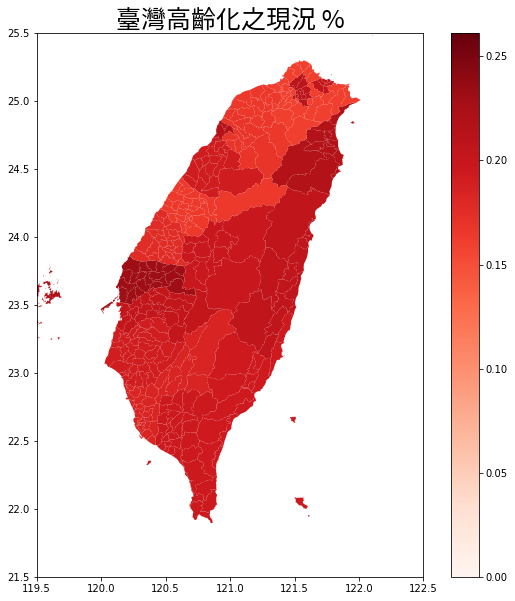

In [ ]:
SA=town_A_no_city.plot(column='city_older_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況 %",fontproperties=myfont,fontsize=25)

Text(0.5, 0, '臺灣獨居化之現況 %')

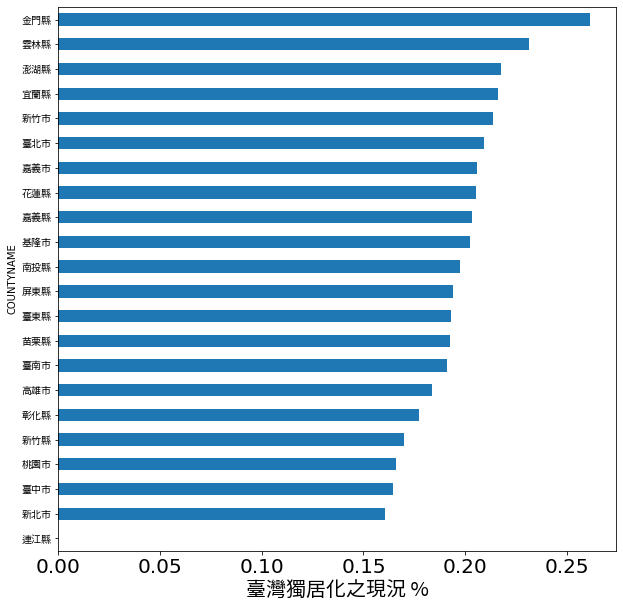

In [ ]:
axes = town_A_no_city.groupby('COUNTYNAME').mean().sort_values('city_older_precent')['city_older_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況 %',fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況鄉鎮 %')

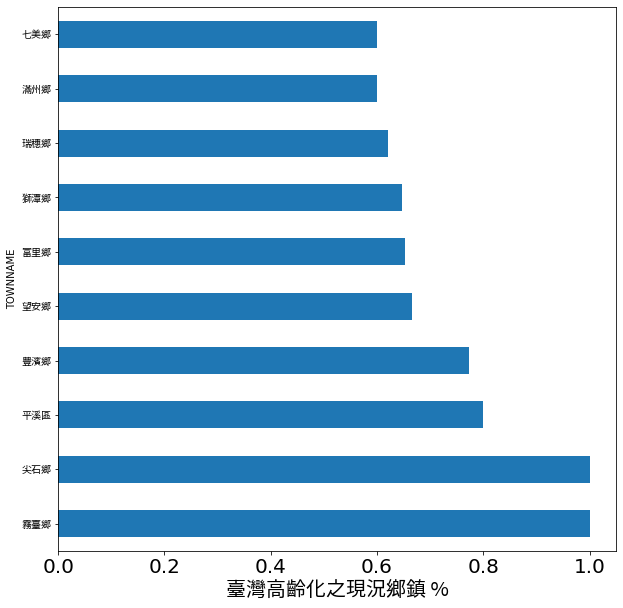

In [ ]:
A = town_A_no_town.groupby('TOWNNAME').mean().sort_values('town_older_precent')['town_older_precent'][::-1][:10]
axes = A.plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況鄉鎮 %',fontproperties=myfont,fontsize=20)

## 2.獨居

Text(0.5, 1.0, '臺灣獨居化之現況 %')

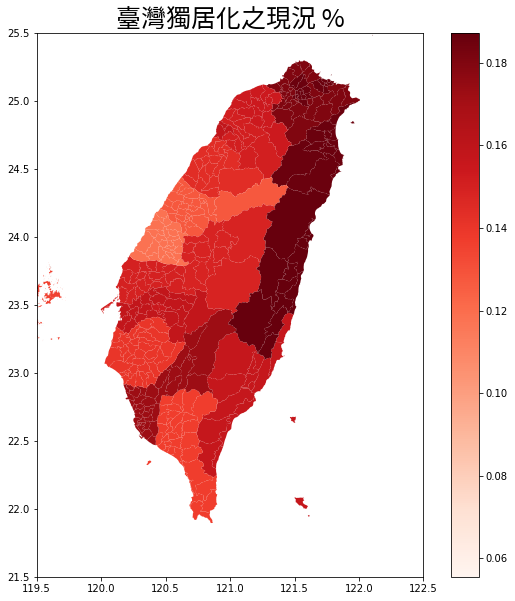

In [ ]:
SA=town_A_no_city.plot(column='city_lonely_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣獨居化之現況 %",fontproperties=myfont,fontsize=25)

Text(0.5, 0, '臺灣獨居化之現況 %')

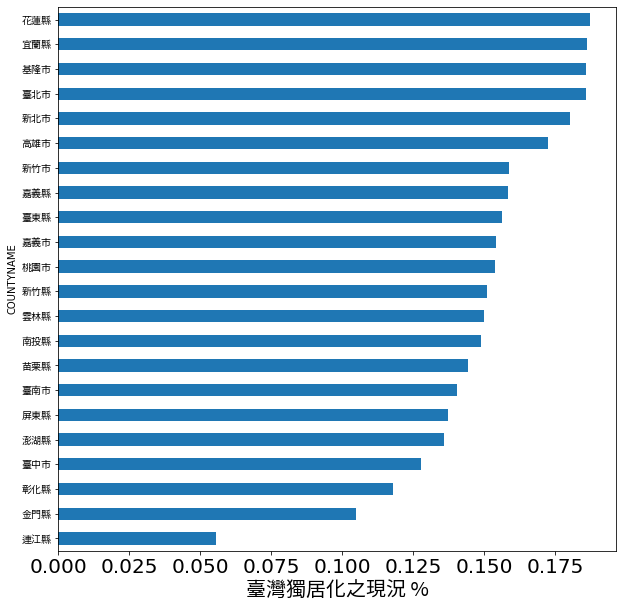

In [ ]:
axes = town_A_no_city.groupby('COUNTYNAME').mean().sort_values('city_lonely_precent')['city_lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況 %',fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況鄉鎮 %')

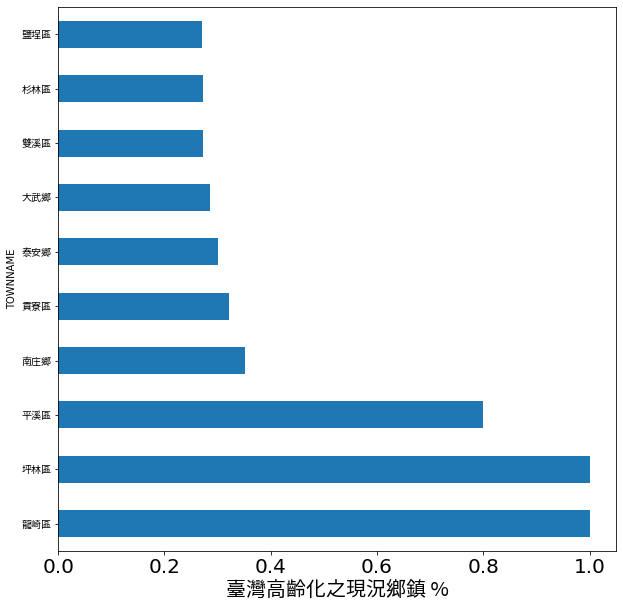

In [ ]:
A = town_A_no_town.groupby('TOWNNAME').mean().sort_values('town_lonely_precent')['town_lonely_precent'][::-1][:10]
axes = A.plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況鄉鎮 %',fontproperties=myfont,fontsize=20)

## 3.高齡且獨居

Text(0.5, 1.0, '臺灣高齡獨居化程度 %')

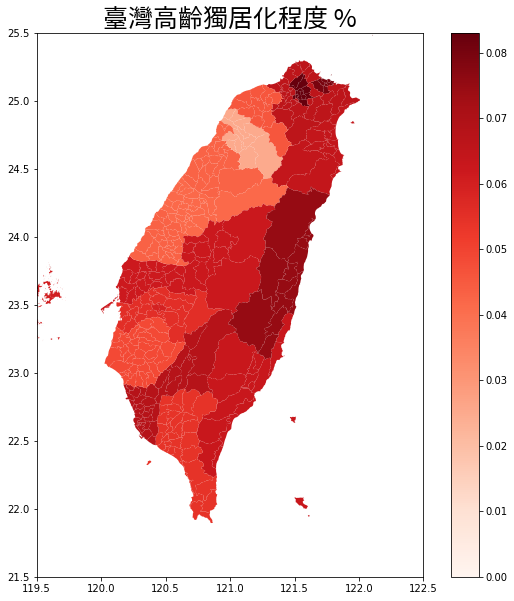

In [ ]:
SA=town_A_no_city.plot(column='city_older_lonely_precent',cmap='Reds', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡獨居化程度 %",fontproperties=myfont,fontsize=25)

Text(0.5, 0, '臺灣高齡獨居化程度 %')

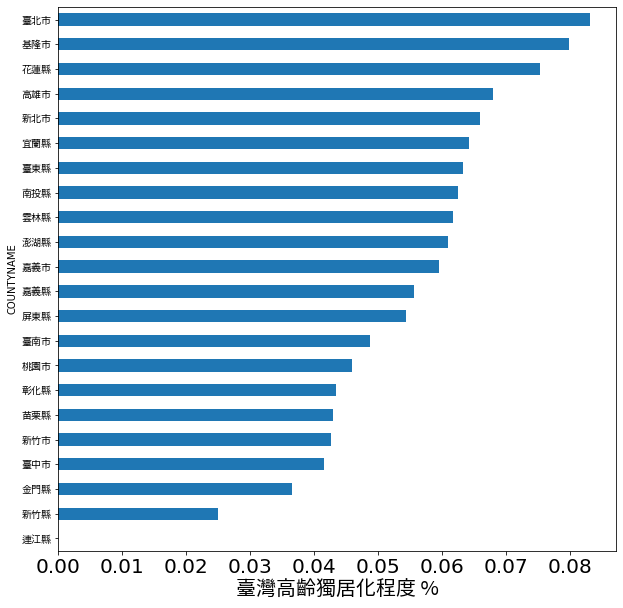

In [ ]:
axes = town_A_no_city.groupby('COUNTYNAME').mean().sort_values('city_older_lonely_precent')['city_older_lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化程度 %',fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況鄉鎮 %')

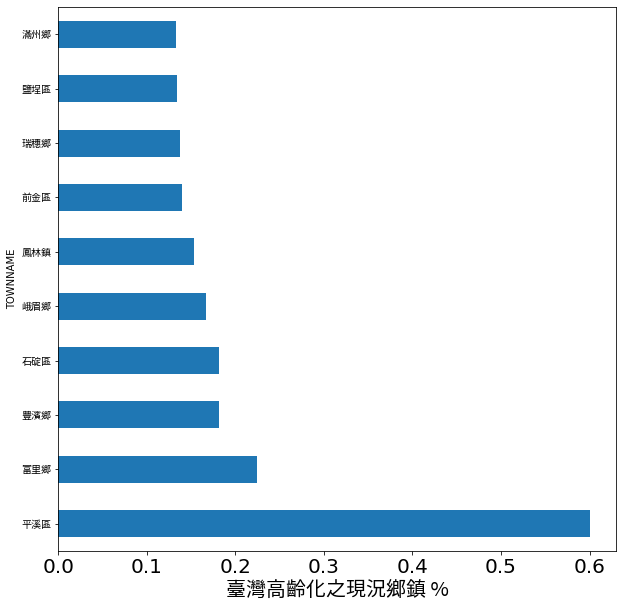

In [ ]:
A = town_A_no_town.groupby('TOWNNAME').mean().sort_values('town_older_lonely_precent')['town_older_lonely_precent'][::-1][:10]
axes = A.plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況鄉鎮 %',fontproperties=myfont,fontsize=20)